# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('E:/Client data/data.csv')

# Display the first few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Customer Demographics Analysis

Summary Statistics for Age:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


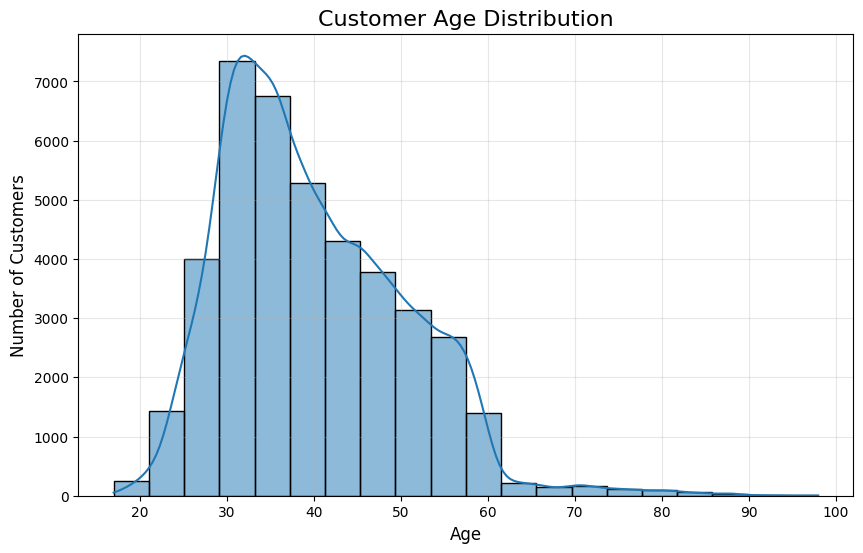

In [17]:
# Age distribution

if 'age' in df.columns:
    
    print("Summary Statistics for Age:")
    print(df['age'].describe())

    
    plt.figure(figsize=(10,6))
    sns.histplot(df['age'], bins=20, kde=True)
    plt.title('Customer Age Distribution', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("Column 'age' not found in the dataset. Please check the column name.")



Job Distribution:
              job  count
0          admin.  10422
1     blue-collar   9254
2      technician   6743
3        services   3969
4      management   2924
5         retired   1720
6    entrepreneur   1456
7   self-employed   1421
8       housemaid   1060
9      unemployed   1014
10        student    875
11        unknown    330


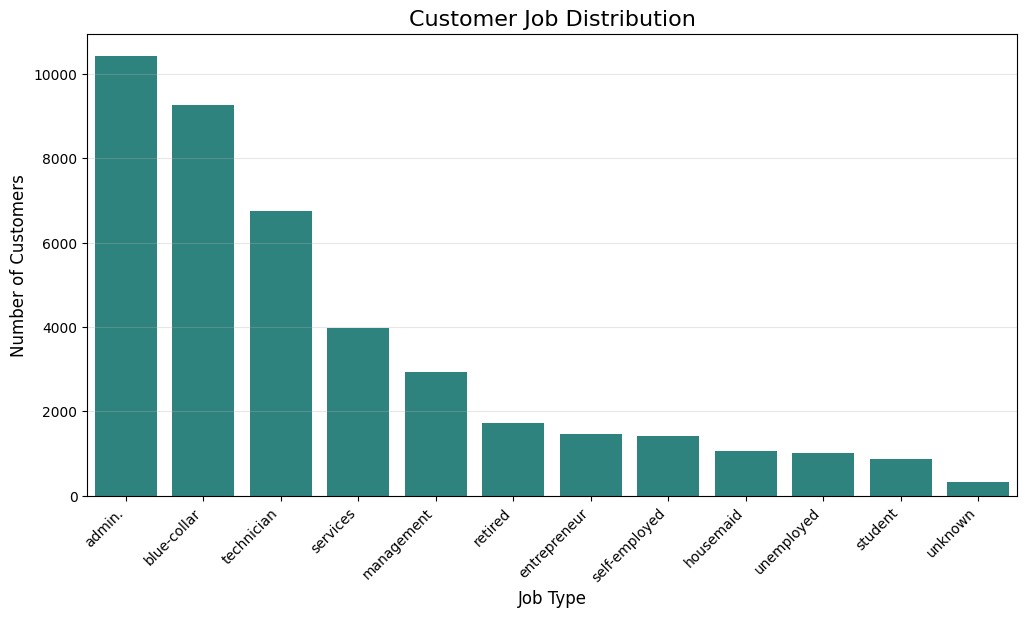

In [18]:
# Job distribution

if 'job' in df.columns:
    job_counts = df['job'].value_counts().sort_values(ascending=False).reset_index()
    job_counts.columns = ['job', 'count']

    print("Job Distribution:")
    print(job_counts)

    plt.figure(figsize=(12,6))
    sns.barplot(data=job_counts, x='job', y='count', color=sns.color_palette("viridis", 1)[0])
    plt.title('Customer Job Distribution', fontsize=16)
    plt.xlabel('Job Type', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

else:
    print("Column 'job' not found in the dataset. Please check the column name.") 



## Balance & Deposit Trends

Analysis of Key Economic Indicators by Subscription Status 

Average Economic Indicators 
| y   | euribor3m   | nr.employed   |
|:----|:------------|:--------------|
| no  | 3.8115      | 5176.17       |
| yes | 2.1231      | 5095.12       |
---------------------------------------------------------------------------


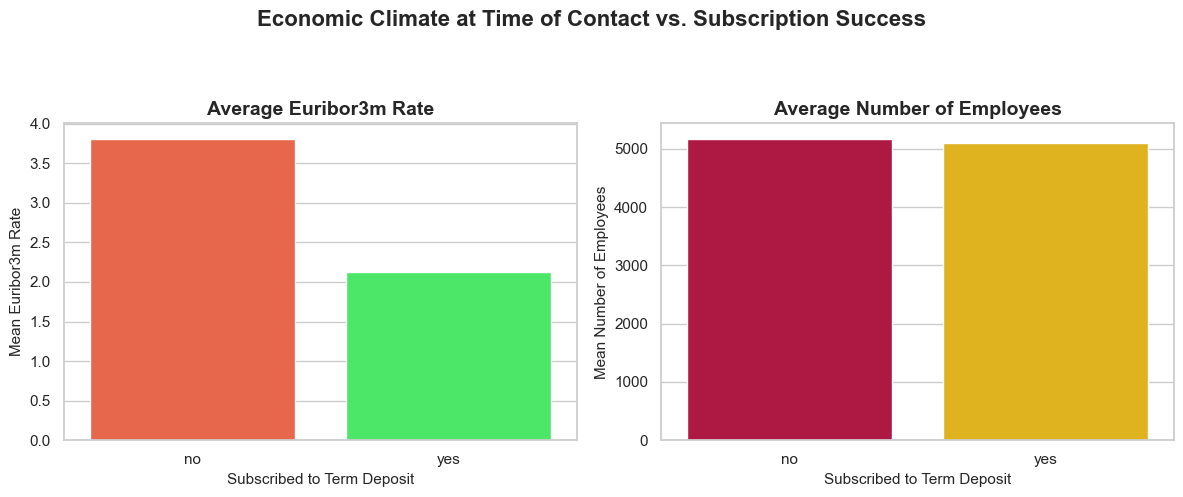

In [19]:
# Average balance by deposit subscription

sns.set_theme(style="whitegrid")

SUBSCRIPTION_COLUMN = 'y'
ECONOMIC_INDICATORS = ['euribor3m', 'nr.employed']

print("Analysis of Key Economic Indicators by Subscription Status ")

indicator_stats = df.groupby(SUBSCRIPTION_COLUMN)[ECONOMIC_INDICATORS].mean().round(4)

print("\nAverage Economic Indicators ")
print(indicator_stats.to_markdown(numalign="left", stralign="left"))
print("-" * 75)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(
    x=indicator_stats.index,
    y=indicator_stats['euribor3m'],
    hue=indicator_stats.index, 
    palette=['#FF5733', '#33FF57'],
    legend=False
)
plt.title('Average Euribor3m Rate', fontsize=14, fontweight='bold')
plt.xlabel('Subscribed to Term Deposit', fontsize=11)
plt.ylabel('Mean Euribor3m Rate', fontsize=11)

plt.subplot(1, 2, 2)
sns.barplot(
    x=indicator_stats.index,
    y=indicator_stats['nr.employed'],
    hue=indicator_stats.index, 
    palette=['#C70039', '#FFC300'],
    legend=False
)
plt.title('Average Number of Employees', fontsize=14, fontweight='bold')
plt.xlabel('Subscribed to Term Deposit', fontsize=11)
plt.ylabel('Mean Number of Employees', fontsize=11)

plt.suptitle('Economic Climate at Time of Contact vs. Subscription Success', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


## Campaign Effectiveness

Contact Method Distribution:
  contact_method  count
0       cellular  26144
1      telephone  15044

Deposit Subscription Rate by Contact Method:
y          yes_percent
contact               
cellular     14.737607
telephone     5.231321


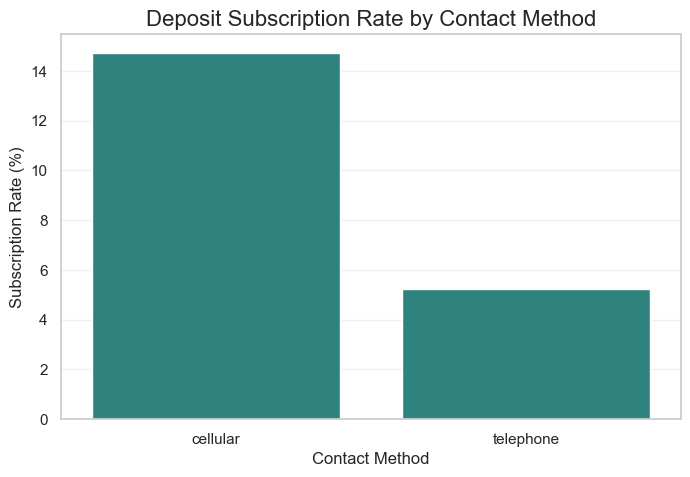

In [20]:
# Contact method analysis

if {'contact', 'y'}.issubset(df.columns):
    contact_counts = df['contact'].value_counts().reset_index()
    contact_counts.columns = ['contact_method', 'count']
    
    print("Contact Method Distribution:")
    print(contact_counts)
    
    contact_deposit = df.groupby(['contact', 'y']).size().unstack(fill_value=0)
    contact_deposit['total'] = contact_deposit.sum(axis=1)
    contact_deposit['yes_percent'] = (contact_deposit['yes'] / contact_deposit['total']) * 100
    
    print("\nDeposit Subscription Rate by Contact Method:")
    print(contact_deposit[['yes_percent']])
    
    plt.figure(figsize=(8,5))
    sns.barplot(data=contact_deposit.reset_index(), x='contact', y='yes_percent', color=sns.color_palette("viridis", 1)[0])
    plt.title('Deposit Subscription Rate by Contact Method', fontsize=16)
    plt.xlabel('Contact Method', fontsize=12)
    plt.ylabel('Subscription Rate (%)', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()
else:
    print("Required columns ('contact', 'y') not found in dataset.")

Deposit Subscription Rate by Number of Contacts:
y         yes_percent
campaign             
1           13.037071
2           11.456954
3           10.747051
4            9.392682
5            7.504690
6            7.660878
7            6.041335
8            4.250000
9            6.007067
10           5.333333
11           6.779661
12           2.400000
13           4.347826
14           1.449275
15           3.921569


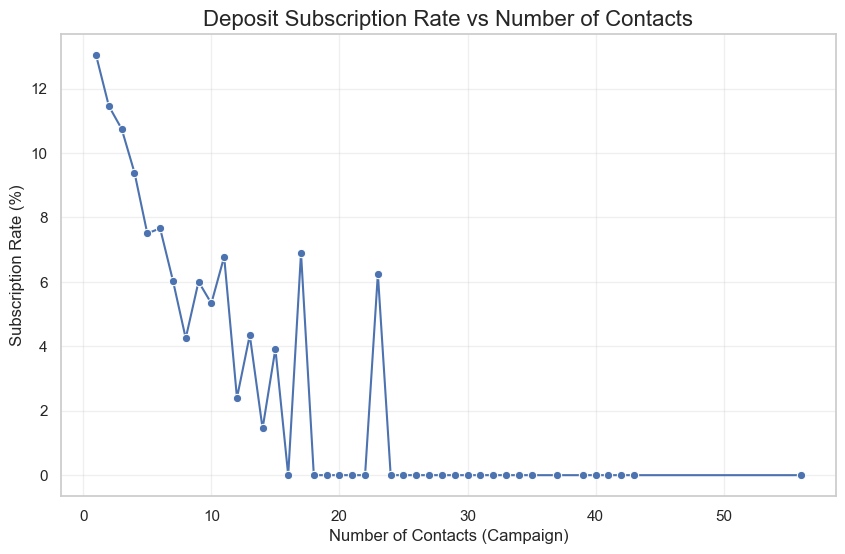

In [21]:
# Number of contacts vs deposit subscription

if {'campaign', 'y'}.issubset(df.columns):
    contact_deposit = df.groupby(['campaign', 'y']).size().unstack(fill_value=0)

    contact_deposit['total'] = contact_deposit.sum(axis=1)
    contact_deposit['yes_percent'] = (contact_deposit['yes'] / contact_deposit['total']) * 100

    print("Deposit Subscription Rate by Number of Contacts:")
    print(contact_deposit[['yes_percent']].head(15))  # show first 15 contact counts

    plt.figure(figsize=(10,6))
    sns.lineplot(data=contact_deposit, x=contact_deposit.index, y='yes_percent', marker='o')
    plt.title('Deposit Subscription Rate vs Number of Contacts', fontsize=16)
    plt.xlabel('Number of Contacts (Campaign)', fontsize=12)
    plt.ylabel('Subscription Rate (%)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("Required columns ('campaign', 'y') not found in dataset.")

## Correlation Heatmap

Correlation Matrix (Top 10 strongest correlations):
age             age               1.000000
emp.var.rate    euribor3m         0.972245
euribor3m       nr.employed       0.945154
nr.employed     emp.var.rate      0.906970
cons.price.idx  emp.var.rate      0.775334
euribor3m       cons.price.idx    0.688230
cons.price.idx  nr.employed       0.522034
pdays           nr.employed       0.372605
euribor3m       pdays             0.296899
                cons.conf.idx     0.277686
dtype: float64


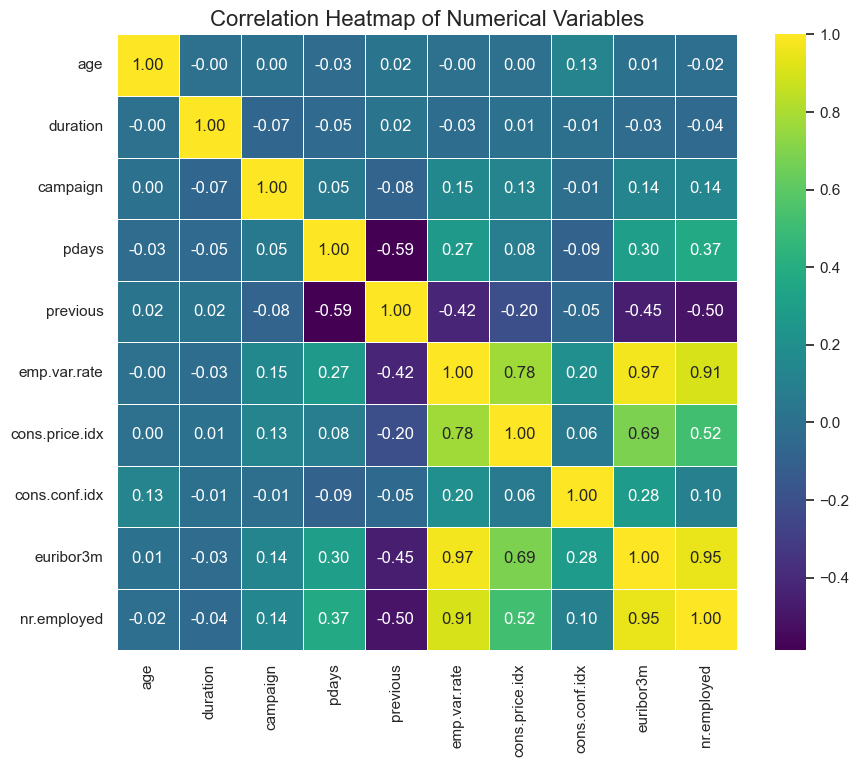

In [22]:
# Correlation of numerical variables

numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

print("Correlation Matrix (Top 10 strongest correlations):")
print(corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10))

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

## Predictive Modeling (Logistic Regression)

Model Evaluation Results
Accuracy: 0.9103

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



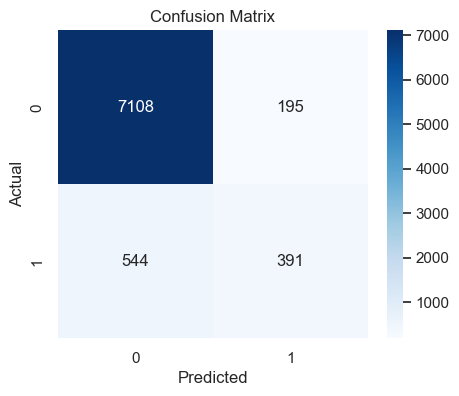

In [23]:
# Encode categorical variables
# Predictions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Evaluation Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

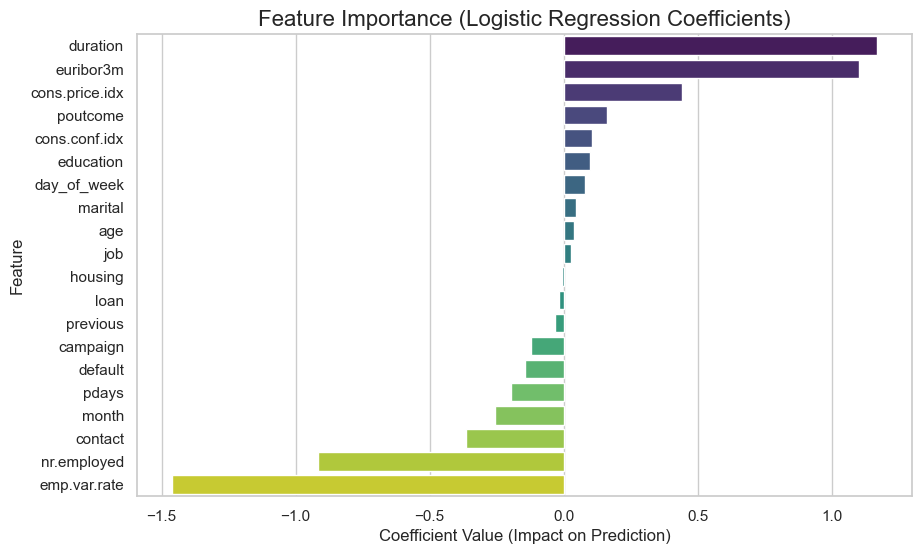

In [24]:
# Feature importance

importance = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature',hue = 'Feature', palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value (Impact on Prediction)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.